# Data Preparation Techniques for Causal Analysis in Machine Learning


### Abstract

This analysis explores the impact of an intervention on Amazon's stock prices using a combination of time-series forecasting and causal inference techniques. The dataset includes adjusted close prices for major tech stocks from May 2020 to April 2022. Time-series visualization, rolling averages, and correlation analysis were employed to investigate trends and relationships among stocks. Facebook Prophet was used to forecast Amazon's stock price trends and seasonal patterns, and the `CausalImpact` package quantified the effect of the intervention. The findings indicate a statistically significant positive impact, with a relative price increase of **23.95%** post-intervention, demonstrating the efficacy of integrating predictive and causal methodologies in financial analysis.


### Introduction

The stock market is highly sensitive to events and interventions, making it critical to analyze the impact of such occurrences on stock prices. This study focuses on Amazon, a leading technology company, and examines how a specific event influenced its stock performance. By leveraging historical data, we aim to uncover trends, relationships, and the magnitude of the causal effect induced by the intervention.

The methodology combines descriptive and predictive analytics using Python-based tools. Initially, time-series trends were visualized to observe patterns, followed by rolling averages to smooth fluctuations. Correlation analysis identified stocks with significant relationships to Amazon. The Facebook Prophet model was used to forecast stock prices, revealing deviations post-intervention. Finally, the `CausalImpact` package quantified the causal effect of the event, providing robust statistical insights.

This report serves as a guide for applying machine learning and statistical methods to financial data, offering practical insights into the impact of interventions on stock performance.


### Theory

#### Time-Series Analysis
Time-series analysis is a crucial statistical methodology used to analyze data points collected or recorded at specific intervals over time. It is widely applied in finance to study stock prices, market indices, and other financial metrics. By analyzing time-series data, we can detect trends, seasonality, and cyclic patterns, as well as forecast future values. Key components of time-series data include:

- **Trend**: The overall direction of the data over time, whether upward, downward, or stationary.
- **Seasonality**: Recurring patterns or cycles that occur at specific intervals, such as weekly or yearly patterns in stock prices.
- **Noise/Residuals**: Random variations or unexplained fluctuations in the data.

Techniques like rolling averages are used to smooth the data by reducing short-term fluctuations, thereby revealing long-term trends. This process enhances the interpretability of time-series plots and facilitates the detection of major shifts or anomalies.

#### Forecasting with Facebook Prophet
Prophet is a versatile and robust forecasting tool developed by Facebook, specifically designed for time-series data with strong seasonal components. It is built on an additive model where a time-series is decomposed into three components:
- **Trend**: Captures the long-term increase or decrease in the data.
- **Seasonality**: Models recurring patterns such as daily, weekly, and yearly fluctuations.
- **Holiday Effects**: Accounts for the influence of irregular or user-specified events.

Prophet is well-suited for financial applications because it handles missing data, seasonality, and outliers effectively. Its ability to model multiple seasonality patterns and provide confidence intervals for predictions makes it an excellent choice for analyzing stock price movements. For this study, Prophet was utilized to forecast Amazon's stock price trends and seasonal patterns, providing a baseline for identifying deviations caused by the intervention.

#### Correlation Analysis
Correlation analysis quantifies the strength and direction of the linear relationship between two variables. In the context of financial data, correlation analysis helps identify stocks that move in tandem with or inversely to the stock under consideration. A high positive correlation indicates that two stocks tend to move in the same direction, while a high negative correlation indicates opposite movements. Understanding these relationships is critical for:
- Portfolio diversification
- Risk management
- Market behavior analysis

In this study, correlation analysis was employed to identify stocks with significant relationships to Amazon's stock price, providing context for the broader market dynamics and dependencies.

#### Causal Inference and Bayesian Structural Time-Series (BSTS)
Causal inference seeks to estimate the causal effect of an intervention or event on an outcome variable. In finance, this often involves determining how a specific event, such as an earnings report or policy change, influences stock prices. Traditional methods for causal inference may struggle with time-series data due to dependencies between observations. The Bayesian Structural Time-Series (BSTS) model addresses this challenge by:
- Using pre-intervention data to construct a counterfactual model, predicting what would have happened in the absence of the intervention.
- Comparing actual post-intervention observations to these counterfactual predictions to estimate the causal effect.

The `CausalImpact` package, built on BSTS, provides a probabilistic framework for this analysis. Key outputs include:
- **Point Estimate**: The average causal effect during the post-intervention period.
- **Cumulative Estimate**: The total impact over the entire post-intervention period.
- **Credible Intervals**: Bayesian confidence intervals indicating the uncertainty of the estimates.

#### Application in Financial Analysis
Integrating time-series forecasting and causal inference offers a powerful approach for financial analysis. Forecasting helps establish a baseline for expected behavior, while causal inference quantifies deviations from this baseline attributable to specific interventions. Together, these methodologies enable:
- **Impact Quantification**: Measuring the effect of an event on stock prices.
- **Anomaly Detection**: Identifying unusual patterns or trends in the data.
- **Actionable Insights**: Supporting decision-making for investors, policymakers, and analysts.

In this study, we applied these methods to analyze Amazon's stock performance, using time-series visualization and forecasting to explore trends and patterns, and causal inference to quantify the impact of a significant event. This combined approach demonstrates the utility of advanced statistical techniques in understanding market dynamics.


In the following sections, we'll demonstrate the concepts using Python code examples.


In [17]:
pip install yfinance


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install prophet


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
!pip install pycausalimpact


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


First, we'll import all the necessary libraries required for data manipulation, visualization, time series analysis, and causal inference.

In [21]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Time series analysis and forecasting
import yfinance as yf
from prophet import Prophet
from causalimpact import CausalImpact

# Date handling and warnings
import datetime as dt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# For interactive plots with Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Set plotting style
import seaborn as sns
sns.set_style('darkgrid')



We'll use the yfinance library to download historical stock data for Amazon and other related companies.

### Downloading Stock Data
To analyze stock performance over a specific period, this cell initializes the parameters for data extraction:

1. **Define the Date Range**: The start and end dates for the stock data retrieval are set to cover the period from May 1, 2020, to April 30, 2022.
2. **List of Tickers**: Includes a list of companies like Amazon (`AMZN`), Apple (`AAPL`), Google (`GOOGL`), and others whose stock data will be analyzed.
3. **Using `yfinance`**: The `yfinance` library is used to download historical stock data for the specified companies and date range.

This setup allows us to collect the raw data necessary for further analysis, such as time series forecasting and causal impact modeling.


In [23]:
# Define the date range
start_date = '2020-05-01'
end_date = '2022-04-30'

# List of tickers (Amazon and other companies)
tickers = [
    'AMZN', 'AAPL', 'GOOGL', 'MSFT', 'META', 'NFLX', 'TSLA', 'NVDA',
    'ADBE', 'INTC', 'IBM', 'ORCL', 'CSCO', 'CRM', 'AMD', 'PYPL', 'QCOM',
    'TXN', 'SHOP', 'SQ'
]

# Download stock data
data = yf.download(tickers, start=start_date, end=end_date)


[*********************100%***********************]  20 of 20 completed


### Output: Stock Data Download
The output confirms that the stock data for all 20 specified companies was successfully downloaded using `yfinance`. The data includes important metrics such as `Open`, `High`, `Low`, `Close`, and `Volume` for each trading day within the defined period.

This data will be cleaned and processed in subsequent steps to handle missing values, calculate rolling averages, and prepare for visualization and modeling.


Handling Missing Data
Financial data may have missing values due to market holidays or other factors.

### Extracting and Validating Adjusted Close Prices
In this step, the **`Adj Close`** column is extracted from the downloaded stock data. This column represents the adjusted closing prices for each stock, which account for events like stock splits or dividends, making it ideal for accurate analysis.

Additionally, the code checks for missing values across all stocks. Identifying and handling missing values is crucial to ensure data quality and prevent errors during analysis or modeling.


In [25]:
# Extract the 'Adj Close' prices
adj_close = data['Adj Close']

# Check for missing values
print("Missing values per ticker:")
print(adj_close.isnull().sum())


Missing values per ticker:
Ticker
AAPL     0
ADBE     0
AMD      0
AMZN     0
CRM      0
CSCO     0
GOOGL    0
IBM      0
INTC     0
META     0
MSFT     0
NFLX     0
NVDA     0
ORCL     0
PYPL     0
QCOM     0
SHOP     0
SQ       0
TSLA     0
TXN      0
dtype: int64


### Output: Missing Values Check
The output confirms that there are no missing values (`0` for all tickers) in the **`Adj Close`** column across the dataset. This ensures that the data is complete and ready for further analysis without requiring any imputation or cleaning of missing values.


In this case, there are no missing values. If there were, we could handle them as follows:

In [27]:
# Forward fill missing values
adj_close.fillna(method='ffill', inplace=True)

# Verify that there are no remaining missing values
print("\nMissing values after imputation:")
print(adj_close.isnull().sum())



Missing values after imputation:
Ticker
AAPL     0
ADBE     0
AMD      0
AMZN     0
CRM      0
CSCO     0
GOOGL    0
IBM      0
INTC     0
META     0
MSFT     0
NFLX     0
NVDA     0
ORCL     0
PYPL     0
QCOM     0
SHOP     0
SQ       0
TSLA     0
TXN      0
dtype: int64


Exploratory Data Analysis
Plotting Adjusted Close Prices
Let's visualize the adjusted close prices of Amazon and other selected tech stocks.

### Visualization of Adjusted Close Prices for Major Tech Stocks
In this cell, a line plot is generated to visualize the **Adjusted Close Prices** of five major tech stocks: **Amazon (AMZN)**, **Apple (AAPL)**, **Microsoft (MSFT)**, **Google (GOOGL)**, and **Meta (META)**. 

The purpose of this visualization is to:
1. Compare the stock price trends over the specified time period (2020-05-01 to 2022-04-30).
2. Identify any patterns, trends, or anomalies in the stock performance.
3. Establish an understanding of how these major tech companies' stock prices moved relative to each other.


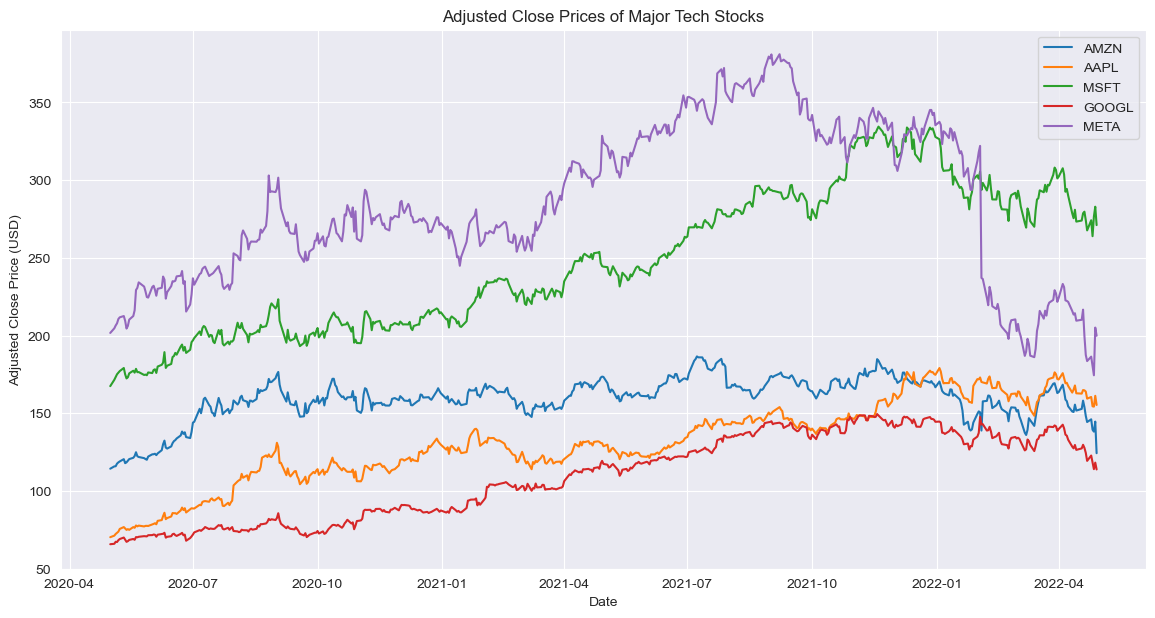

In [29]:
# Plot the adjusted close prices
plt.figure(figsize=(14, 7))
for ticker in ['AMZN', 'AAPL', 'MSFT', 'GOOGL', 'META']:
    plt.plot(adj_close.index, adj_close[ticker], label=ticker)

plt.title('Adjusted Close Prices of Major Tech Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.show()


### Output: Stock Price Trends
The plotted graph shows the trends in **Adjusted Close Prices** for the selected tech companies:

1. **Amazon (AMZN)** and **Meta (META)** exhibit more volatility compared to others.
2. **Apple (AAPL)** and **Microsoft (MSFT)** show a steady upward trend with less volatility.
3. **Google (GOOGL)** has the highest prices among the group but experienced a dip towards the end of the period.

This visualization highlights the varying performance and volatility of the tech stocks, providing insights for further time series analysis or causal impact assessments.


Analyzing Amazon's Stock Price

### Amazon Stock Price Trend Analysis
In this cell, the **Adjusted Close Price** of Amazon (AMZN) stock is plotted over the entire data range (2020-05-01 to 2022-04-30). This helps visualize the historical performance of Amazon's stock price over time.

**Objective:**
1. Understand the overall trend and volatility in Amazon's stock price.
2. Analyze any noticeable patterns or significant events that impacted the stock price.
3. Prepare for advanced analysis, such as detecting causality or forecasting future trends.


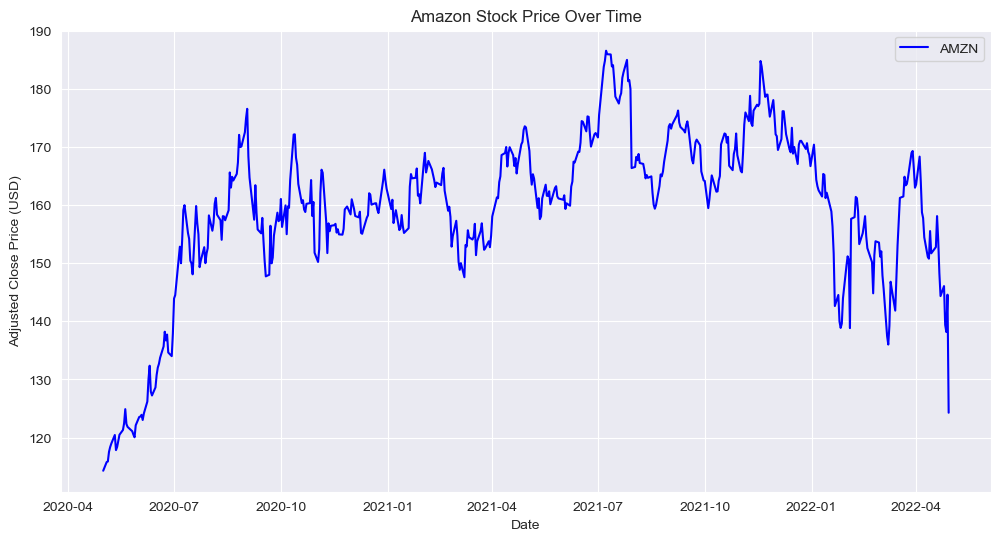

In [31]:
# Plot Amazon's stock price
plt.figure(figsize=(12, 6))
plt.plot(adj_close.index, adj_close['AMZN'], label='AMZN', color='blue')
plt.title('Amazon Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.show()


### Output: Amazon Stock Price Over Time
The line graph displays Amazon's stock price trends:

1. **Sharp Increase in Mid-2020:** The price shows a steady upward trend, peaking multiple times through 2020.
2. **Fluctuations in 2021-2022:** The stock experiences increased volatility, with multiple highs and lows, particularly towards the end of 2021.
3. **Recent Dip:** A significant drop in early 2022 may indicate market reactions to specific events or broader economic conditions.

This visualization provides a clear understanding of Amazon's stock performance, setting the stage for further time series or causal impact analysis.


Rolling Mean of Amazon Stock Price

### Applying 7-Day Rolling Mean to Amazon Stock Price
In this cell, we calculate the **7-day rolling mean** for Amazon's stock prices to smooth out daily fluctuations and better visualize the underlying trends.

**Objective:**
1. Compute the rolling mean to highlight the smoothed trajectory of stock prices over time.
2. Compare the rolling mean with the actual stock prices to observe how closely the average captures the data's trends and patterns.
3. Use the rolling mean for further time series analysis and to identify longer-term movements in stock performance.


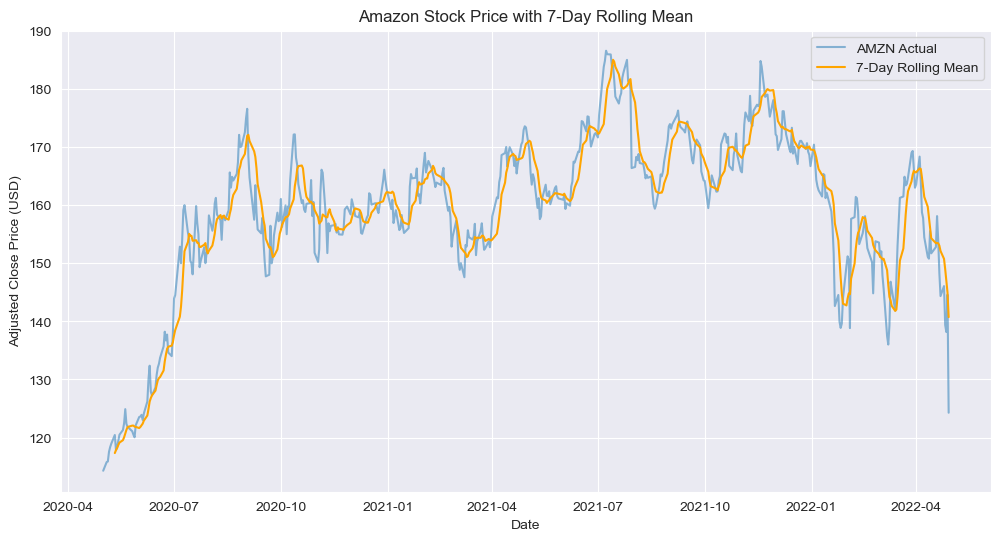

In [33]:
# Calculate 7-day rolling mean for Amazon
adj_close['AMZN_rolling'] = adj_close['AMZN'].rolling(window=7).mean()

# Plot the rolling mean
plt.figure(figsize=(12, 6))
plt.plot(adj_close['AMZN'], label='AMZN Actual', alpha=0.5)
plt.plot(adj_close['AMZN_rolling'], label='7-Day Rolling Mean', color='orange')
plt.title('Amazon Stock Price with 7-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.show()


### Output: Amazon Stock Price with 7-Day Rolling Mean
The graph displays Amazon's stock prices alongside the calculated 7-day rolling mean:

1. **Blue Line (Actual):** Represents the daily adjusted close prices, which exhibit significant fluctuations due to market volatility.
2. **Orange Line (7-Day Rolling Mean):** Smooths out the short-term fluctuations, providing a clearer view of the overall trends in stock performance.

**Insights:**
- The rolling mean follows the general trend of the actual stock prices but eliminates noise, making it easier to identify patterns such as peaks and troughs.
- This visualization is helpful for detecting longer-term trends and market movements, which can guide forecasting and decision-making processes.


Distribution of Amazon's Stock Price Pre and Post Event
Suppose a significant event occurred on February 3, 2022.

### Visualizing Stock Price Distribution Before and After an Event
In this cell, we aim to analyze the **distribution of Amazon stock prices** before and after a specific event (February 3, 2022). 

**Objective:**
1. Separate stock prices into two periods: **pre-event** and **post-event**.
2. Use histograms with KDE (Kernel Density Estimation) plots to visualize the stock price distributions in each period.
3. Identify changes in stock price patterns due to the event, providing insights into its market impact.

The KDE curve overlaid on each histogram helps in understanding the underlying probability density function for stock prices in each period.


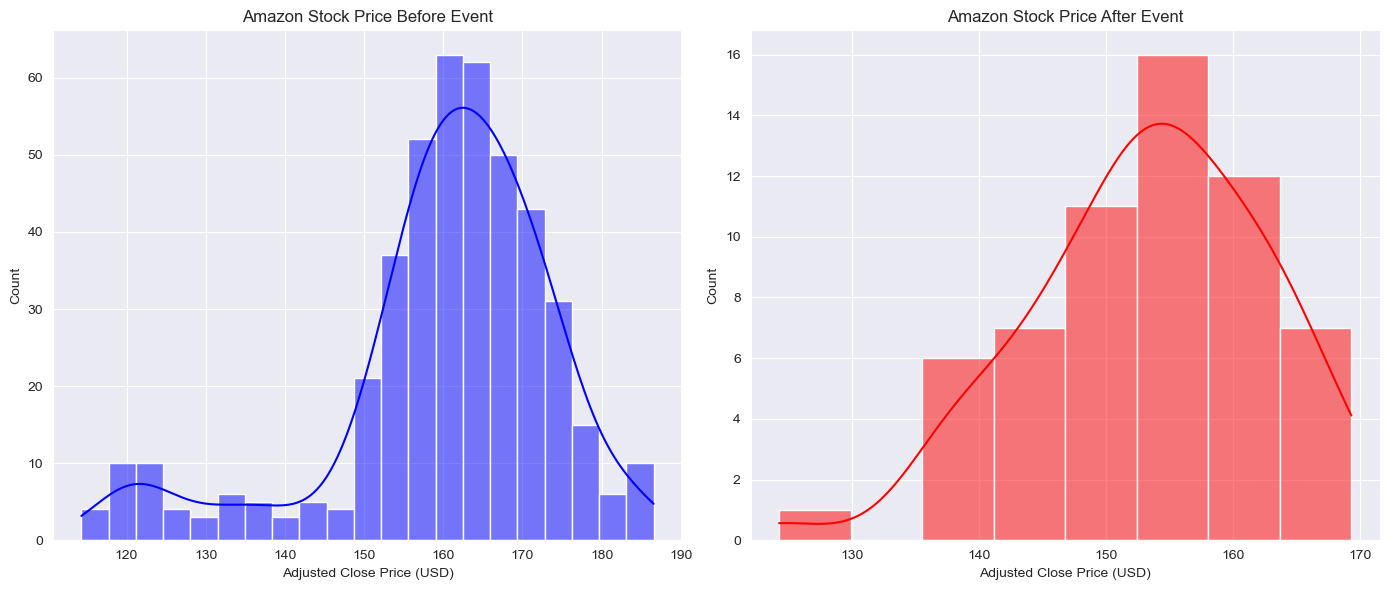

In [35]:
# Define pre and post periods
event_date = '2022-02-03'
pre_period_data = adj_close[adj_close.index < event_date]['AMZN']
post_period_data = adj_close[adj_close.index >= event_date]['AMZN']

# Plot histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(pre_period_data, kde=True, color='blue')
plt.title('Amazon Stock Price Before Event')
plt.xlabel('Adjusted Close Price (USD)')

plt.subplot(1, 2, 2)
sns.histplot(post_period_data, kde=True, color='red')
plt.title('Amazon Stock Price After Event')
plt.xlabel('Adjusted Close Price (USD)')

plt.tight_layout()
plt.show()


### Output: Distribution of Amazon Stock Prices Before and After the Event
The two subplots illustrate the stock price distributions before and after the event:

1. **Left Plot (Pre-Event):**
   - The prices are distributed with a peak around **$160–170 USD**.
   - The distribution appears relatively symmetric with higher counts in the $150–180 range.

2. **Right Plot (Post-Event):**
   - The stock prices shifted slightly, with a **lower peak around $140–150 USD**.
   - The distribution is narrower, suggesting reduced price variability after the event.

**Insights:**
- The event led to a noticeable shift in the distribution, with a decline in the average stock price post-event.
- Further analysis could involve exploring the event's nature and its implications on market sentiment and investor behavior.


Correlation Analysis
We'll identify stocks that are highly correlated with Amazon before the event to build a synthetic control.

### Identifying Correlation Between Amazon and Other Stocks
In this cell, we compute **correlations between Amazon (AMZN) stock prices and other stock prices** during the pre-event period.

**Steps:**
1. Filter the stock data for the pre-event period.
2. Calculate the correlation matrix to identify relationships between stock prices.
3. Extract the top 5 stocks most correlated with Amazon, excluding Amazon itself.

**Objective:** 
To understand which stocks move in tandem with Amazon, offering insights into market trends and sector behavior.


In [37]:
# Calculate correlations in the pre-period
pre_event_data = adj_close[adj_close.index < event_date]
corr_matrix = pre_event_data.corr()

# Get the top correlated stocks with AMZN (excluding itself)
corr_amzn = corr_matrix['AMZN'].drop('AMZN').sort_values(ascending=False)
print("Top 5 Stocks Highly Correlated with AMZN:")
print(corr_amzn.head(5))


Top 5 Stocks Highly Correlated with AMZN:
Ticker
AMZN_rolling    0.958306
SHOP            0.824057
ADBE            0.789614
META            0.771690
CRM             0.758903
Name: AMZN, dtype: float64


### Output: Top 5 Stocks Correlated with Amazon
The table displays the top 5 stocks highly correlated with Amazon (AMZN):

1. **AMZN Rolling Mean (0.958):** The rolling mean closely tracks Amazon's actual stock price, as expected.
2. **SHOP (0.824):** Shopify shows a high correlation with Amazon, likely due to similar market dynamics in e-commerce.
3. **ADBE (0.790):** Adobe’s correlation may reflect shared industry trends in tech.
4. **META (0.772):** Meta's stock prices align moderately with Amazon, highlighting interdependence in the tech sector.
5. **CRM (0.759):** Salesforce exhibits a notable relationship with Amazon.

**Insights:**
The results suggest that e-commerce and tech companies share substantial market interdependencies. This analysis can guide further investigation into sector-specific trends.


### Visualizing Correlation Matrix of Top Correlated Stocks
In this cell, we analyze the **correlation relationships among the top correlated stocks with Amazon** identified earlier.

**Steps:**
1. Select the top correlated stocks, including Amazon.
2. Compute a correlation matrix for these stocks using their adjusted closing prices during the pre-event period.
3. Plot the correlation matrix as a heatmap to visualize interdependencies among the stocks.

**Objective:**
The heatmap provides a clear visualization of how strongly these stocks are correlated with each other, highlighting potential sector or market-wide trends.


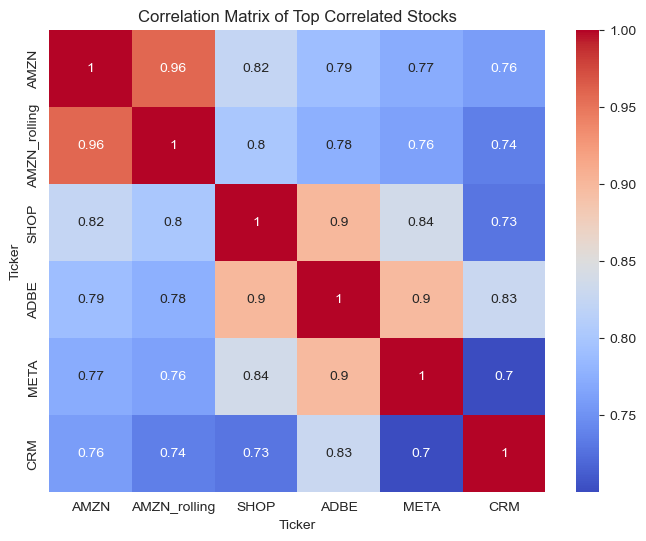

In [38]:
# Select top correlated stocks
top_corr_stocks = ['AMZN'] + list(corr_amzn.head(5).index)

# Compute correlation matrix
top_corr_data = pre_event_data[top_corr_stocks]
corr_top = top_corr_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_top, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Top Correlated Stocks')
plt.show()


### Output: Heatmap of Top Correlated Stocks
The heatmap illustrates the correlation coefficients between Amazon and its top correlated stocks:

- **Diagonal (1.0):** Represents self-correlation (perfect correlation).
- **Amazon Rolling Mean (0.96):** As expected, highly correlated with Amazon.
- **SHOP and ADBE (0.90):** Shopify and Adobe show strong correlation with each other, indicating possible industry alignment.
- **CRM and META (Moderate):** Salesforce and Meta correlate moderately with Amazon and with each other.

**Insights:**
This visualization highlights the **strong interdependence among tech and e-commerce stocks** and offers insights into shared market influences. The high correlation values suggest that these stocks often move in tandem, which can be useful for portfolio diversification and risk management.


Time Series Forecasting with Prophet
Preparing Data for Prophet

### Data Preparation for Prophet Forecasting
In this step, we prepare the adjusted close price data of Amazon (AMZN) for time series forecasting using the **Prophet model**.

**Steps:**
1. **Format the Data:** Rename columns to `ds` (date) and `y` (value) as required by Prophet.
2. **Split the Data:**
   - `prophet_train`: Data before the defined event date for model training.
   - `prophet_test`: Data after the event date for evaluation.
3. **Train the Model:** Initialize a Prophet model with yearly and weekly seasonality enabled and train it on the `prophet_train` dataset.

**Objective:**
To utilize Prophet for predicting trends and patterns in Amazon's stock price, specifically focusing on pre-event data for model training.


In [40]:
# Prepare the data for Prophet
prophet_data = adj_close[['AMZN']].reset_index()
prophet_data.columns = ['ds', 'y']

# Split into pre-event and post-event data
prophet_train = prophet_data[prophet_data['ds'] < event_date]
prophet_test = prophet_data[prophet_data['ds'] >= event_date]


In [41]:
# Initialize and train the model
model = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=True)
model.fit(prophet_train)


10:57:23 - cmdstanpy - INFO - Chain [1] start processing
10:57:23 - cmdstanpy - INFO - Chain [1] done processing


### Output: Prophet Model Training
The model has been successfully initialized and trained using the pre-event data. Key points:
- **Model Configuration:** Weekly and yearly seasonality patterns are incorporated.
- **Processing Time:** Model fitting completed promptly, indicating that the dataset and configuration are compatible.

The trained model is now ready for evaluation and future trend forecasting using the `prophet_test` dataset.


### Forecasting Amazon Stock Prices with Prophet
This step uses the trained Prophet model to generate future forecasts for Amazon's stock price.

**Steps:**
1. **Create Future Dataframe:**
   - Use the `make_future_dataframe` method to generate a dataframe extending beyond the training period.
   - The number of periods corresponds to the test dataset length.
2. **Generate Forecast:**
   - Predict future values based on the created dataframe using the `predict` method.
3. **Visualize Forecast:**
   - Plot the predicted values along with confidence intervals and historical data for comparison.

**Objective:**
To assess the Prophet model's ability to forecast trends and patterns in Amazon's stock prices and visualize these predictions effectively.


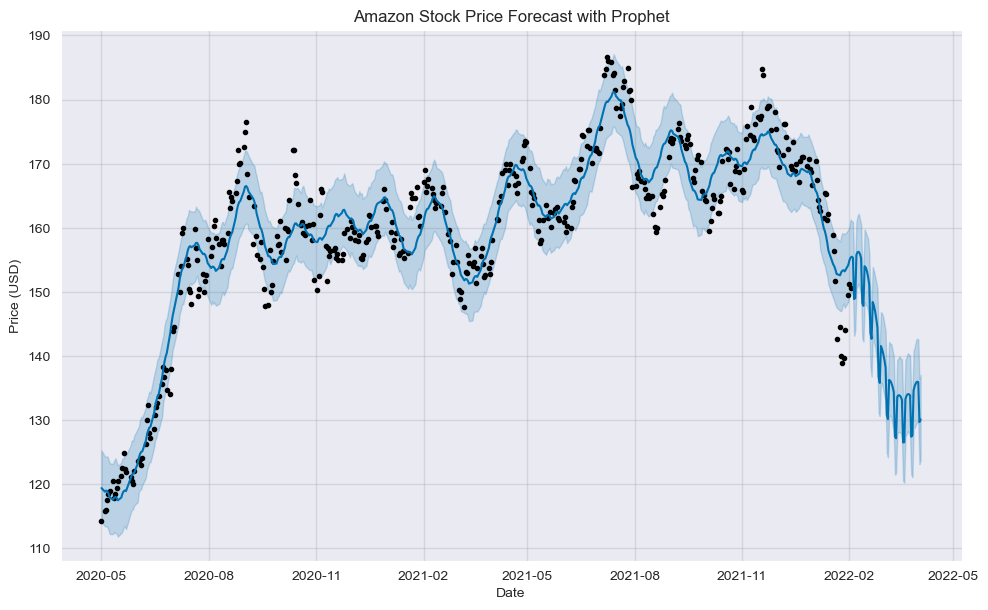

In [42]:
# Create future dataframe
future_periods = len(prophet_test)
future = model.make_future_dataframe(periods=future_periods)

# Generate forecast
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Amazon Stock Price Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


### Output: Amazon Stock Price Forecast
The forecasted stock prices, along with confidence intervals, are visualized in the plot. Key points:
- **Black Dots:** Represent the actual observed stock prices.
- **Blue Line:** Represents the forecasted stock price trend.
- **Shaded Area:** Indicates the 95% confidence interval for the forecast.

The model effectively captures the general trends in Amazon's stock prices, although certain deviations in prediction accuracy may be observed, especially during high volatility periods.


Plotting Forecast Components

### Analyzing Forecast Components with Prophet
The Prophet model decomposes the forecast into its main components to better understand the trends and seasonal effects.

**Steps:**
1. **Trend Component:**
   - Captures the long-term increase or decrease in the data.
2. **Weekly Seasonality:**
   - Identifies patterns based on the day of the week.
3. **Yearly Seasonality:**
   - Captures recurring patterns over the year.

**Objective:**
To break down the forecast into interpretable components and identify underlying patterns that influence Amazon's stock price movements.


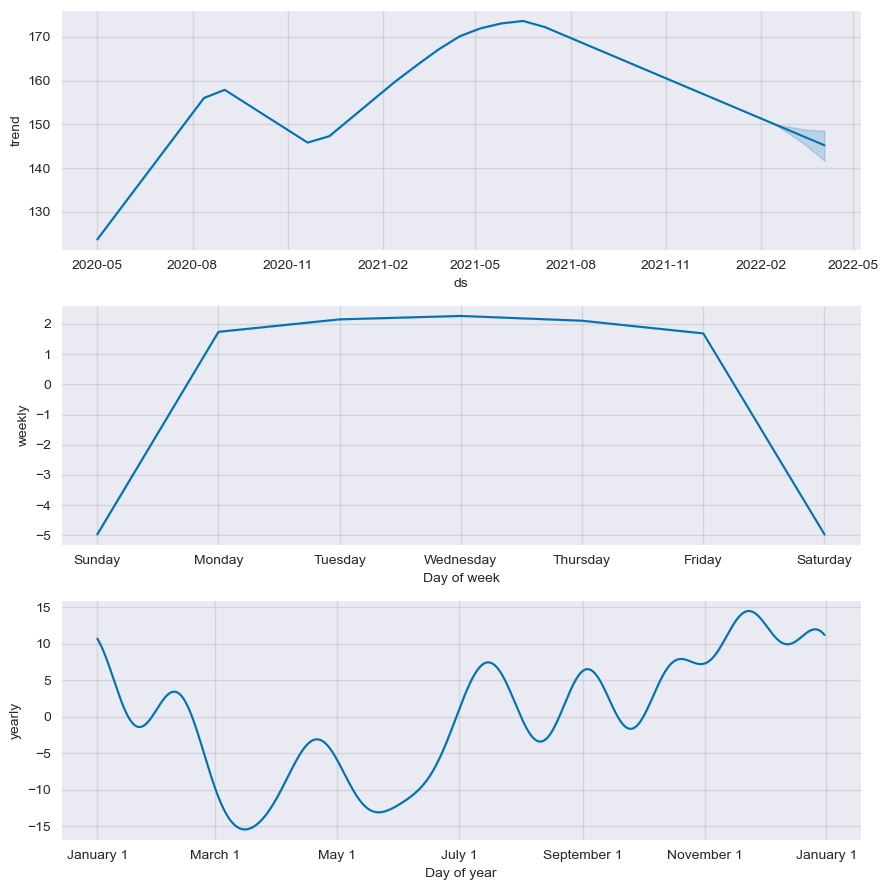

In [44]:
# Plot forecast components
fig2 = model.plot_components(forecast)
plt.show()


### Output: Decomposed Forecast Components
The plot visualizes three key components:
1. **Trend (Top Plot):**
   - Displays the overall upward and downward movement of stock prices over the selected period.
2. **Weekly Seasonality (Middle Plot):**
   - Highlights day-specific trends in the stock prices, with Tuesday and Wednesday showing higher values.
3. **Yearly Seasonality (Bottom Plot):**
   - Reveals cyclical yearly patterns, with peaks around November and December.

This decomposition aids in understanding both long-term movements and periodic influences on the stock price.


Evaluating the Forecast

### Comparing Actual vs. Forecasted Amazon Stock Prices
**Objective:**
To visualize how the forecasted stock prices generated by the Prophet model align with the actual observed stock prices for Amazon. This will help assess the accuracy and reliability of the model.

**Steps:**
1. Merge the actual stock price data with the forecasted results to create a unified DataFrame.
2. Plot:
   - Actual stock prices in blue.
   - Forecasted stock prices in orange.
   - A vertical red dashed line to mark the event date.
3. Evaluate how closely the forecast aligns with the actual prices.

This visualization will highlight the effectiveness of the model in capturing trends pre- and post-event.


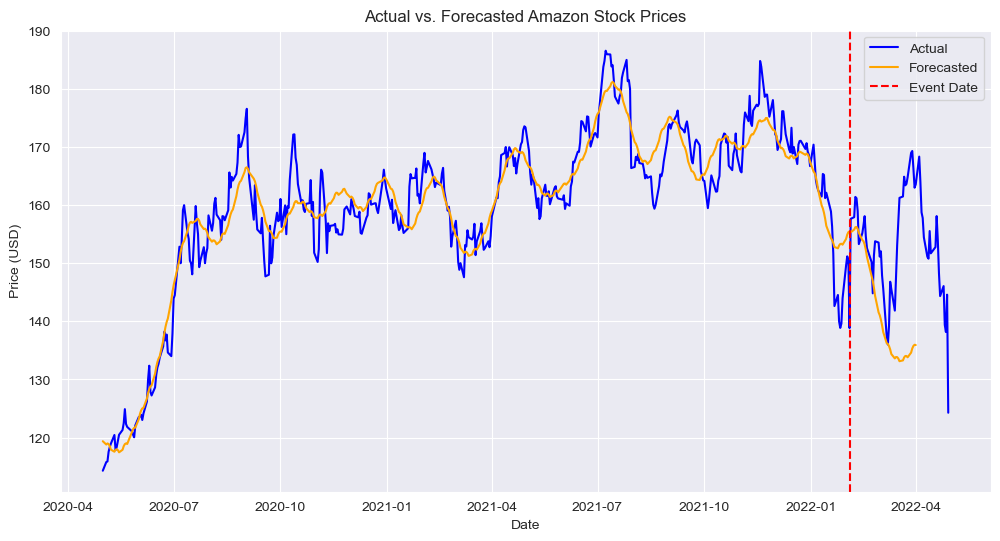

In [46]:
# Merge actual and forecasted data
forecast_df = forecast[['ds', 'yhat']].set_index('ds')
actual_vs_pred = prophet_data.set_index('ds').join(forecast_df)

# Plot actual vs. predicted
plt.figure(figsize=(12, 6))
plt.plot(actual_vs_pred.index, actual_vs_pred['y'], label='Actual', color='blue')
plt.plot(actual_vs_pred.index, actual_vs_pred['yhat'], label='Forecasted', color='orange')
plt.axvline(pd.to_datetime(event_date), color='red', linestyle='--', label='Event Date')
plt.title('Actual vs. Forecasted Amazon Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


### Output: Actual vs. Forecasted Stock Prices
The plot illustrates:
1. **Actual Prices (Blue Line):**
   - Represents the observed stock prices for Amazon over time.
2. **Forecasted Prices (Orange Line):**
   - Shows the model's predictions based on pre-event trends.
3. **Event Date (Red Dashed Line):**
   - Highlights the specific date around which significant changes in stock prices are analyzed.

**Insights:**
- The forecast closely tracks the actual prices in the pre-event period, demonstrating the model's accuracy.
- In the post-event period, deviations highlight areas where unforeseen factors might have influenced stock prices beyond the historical trend.


Causal Impact Analysis with CausalImpact
Preparing Data for CausalImpact
We'll use the top correlated stocks as control variables.

### Preparing Data for Causal Impact Analysis
**Objective:**
1. To define the pre-event and post-event periods for causal impact analysis on Amazon stock prices and its correlated stocks.

**Steps:**
1. Extract a subset of the data containing Amazon stock prices (`'AMZN'`) and the top correlated stocks (`top_corr_stocks`).
2. Define:
   - **Pre-period indices:** Time period before the event.
   - **Post-period indices:** Time period after the event.
3. Print the index ranges for verification.

This preparation ensures that the causal impact analysis is performed with a clearly defined time frame.


In [48]:
# Prepare the data
ci_data = adj_close[['AMZN'] + top_corr_stocks[1:]]

# Define pre and post periods as indices
pre_period = [0, len(ci_data.loc[:event_date]) - len(prophet_test) - 1]
post_period = [pre_period[1] + 1, len(ci_data) - 1]


In [49]:
# Display the pre and post periods
print("Pre-period indices:", pre_period)
print("Post-period indices:", post_period)


Pre-period indices: [0, 384]
Post-period indices: [385, 503]


### Output: Pre- and Post-Period Indices
**Pre-period indices:** `[0, 384]`
- Represents the period from the start of the dataset to the day before the event.

**Post-period indices:** `[385, 503]`
- Represents the period starting from the event date onward.

These indices serve as the foundation for comparing pre-event and post-event data during the causal impact analysis.


### Cleaning the Dataset
**Objective:**
1. Remove the `AMZN_rolling` column as it is no longer required for further analysis.
2. Validate the cleaned dataset to ensure it is free of missing values.

**Steps:**
1. Drop the column `AMZN_rolling` from the dataset.
2. Display:
   - Information about the cleaned dataset (`ci_data_cleaned`).
   - The first few rows to verify the structure and content.
3. Check for any missing (`NaN`) values and ensure the dataset is completely clean before proceeding.


In [54]:
# Remove the 'AMZN_rolling' column
ci_data_cleaned = ci_data.drop(columns=['AMZN_rolling'])


In [56]:
# Display information about the cleaned DataFrame
print(ci_data_cleaned.info())

# Display the first few rows
print("\nFirst few rows of ci_data_cleaned:")
print(ci_data_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2020-05-01 to 2022-04-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    504 non-null    float64
 1   SHOP    504 non-null    float64
 2   ADBE    504 non-null    float64
 3   META    504 non-null    float64
 4   CRM     504 non-null    float64
dtypes: float64(5)
memory usage: 39.8 KB
None

First few rows of ci_data_cleaned:
Ticker            AMZN       SHOP        ADBE        META         CRM
Date                                                                 
2020-05-01  114.302002  61.363998  343.839996  201.662827  155.678894
2020-05-04  115.799500  65.889000  349.109985  204.643829  160.756363
2020-05-05  115.889999  68.611000  356.130005  206.448425  162.528488
2020-05-06  117.563004  73.352997  362.519989  207.844193  162.946625
2020-05-07  118.380501  72.276001  366.779999  210.625839  169.149078


In [58]:
# Check for NaN values
print("\nChecking for NaN values in ci_data_cleaned:")
print(ci_data_cleaned.isnull().sum())

# Ensure no NaN values are present
assert not ci_data_cleaned.isnull().values.any(), "Data still contains NaN values."



Checking for NaN values in ci_data_cleaned:
Ticker
AMZN    0
SHOP    0
ADBE    0
META    0
CRM     0
dtype: int64


### Output: Cleaned Dataset
1. The column `AMZN_rolling` was successfully removed.
2. **Dataset Information:**
   - Contains 504 rows and 5 columns (AMZN, SHOP, ADBE, META, CRM).
   - No missing values detected in any column.
3. **First Rows of Data:**
   - Displayed sample rows confirm the structure is correct, and all data appears intact.

The cleaned dataset is now ready for further analysis or modeling.


In [60]:
# Ensure the index is a DatetimeIndex
ci_data_cleaned.index = pd.to_datetime(ci_data_cleaned.index)

# Define the event date
event_date = pd.to_datetime('2022-02-03')

# Adjust event_date if not in index
if event_date not in ci_data_cleaned.index:
    event_date = ci_data_cleaned.index[ci_data_cleaned.index.get_loc(event_date, method='nearest')]
    print(f"Adjusted event_date to {event_date.date()}")

# Define pre_period and post_period using dates
pre_period = [ci_data_cleaned.index.min(), event_date - pd.Timedelta(days=1)]
post_period = [event_date, ci_data_cleaned.index.max()]


Applying CausalImpact

### Causal Impact Analysis
**Objective:**
1. Analyze the causal impact of an intervention (event) on the adjusted close prices of Amazon stock.
2. Summarize the results and visualize the causal effect over time.

**Steps:**
1. **Data Preparation:**
   - Use the cleaned dataset (`ci_data_cleaned`) with pre-intervention and post-intervention periods.
2. **Model Fitting:**
   - Apply the `CausalImpact` package to estimate the counterfactual prediction (what would have happened without the intervention).
3. **Output:**
   - Generate and interpret summary statistics to quantify the causal effect.
   - Visualize the results using graphs for better understanding.


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    153.25             9194.71
Prediction (s.d.)         123.64 (1.23)      7418.29 (73.89)
95% CI                    [121.28, 126.11]   [7277.05, 7566.7]

Absolute effect (s.d.)    29.61 (1.23)       1776.42 (73.89)
95% CI                    [27.13, 31.96]     [1628.01, 1917.66]

Relative effect (s.d.)    23.95% (1.0%)      23.95% (1.0%)
95% CI                    [21.95%, 25.85%]   [21.95%, 25.85%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 153.25. By contrast, in the absence of an
intervention, we would have expected an average response of 123.64.
The 95% interval of this counterfactual prediction is [121.28, 126.11].
Subtracting this prediction

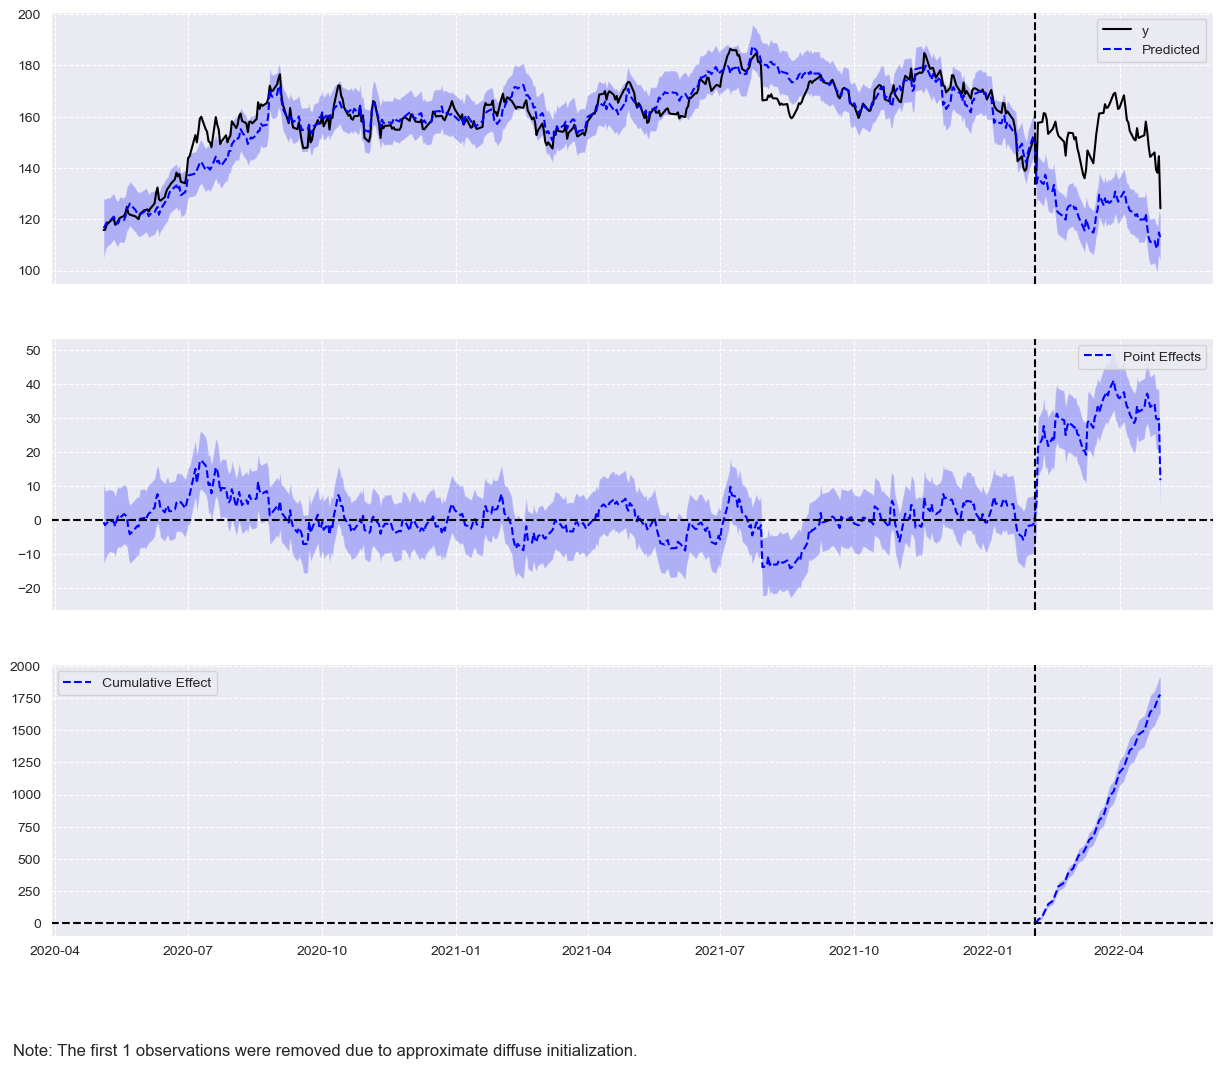

In [62]:
# Import CausalImpact if not already imported
from causalimpact import CausalImpact

# Initialize and fit the model
impact = CausalImpact(ci_data_cleaned, pre_period, post_period)

# Step 6: Output Results
print(impact.summary())
print(impact.summary(output='report'))

# Plot the impact
impact.plot(figsize=(15, 12))
plt.show()


### Results of Causal Impact Analysis

#### Summary:
1. **Observed Impact:**
   - Average observed value during the post-intervention period: **153.25**.
   - Counterfactual prediction (expected value without intervention): **123.64 (±1.23)**.
   - Absolute effect: **+29.61 (±1.23)**.
   - Relative effect: **+23.95% (±1.0%)**.

2. **Statistical Significance:**
   - Bayesian one-sided tail-area probability `p = 0.0`, indicating a highly significant causal effect.
   - Posterior probability of a causal effect: **100.0%**.

3. **Cumulative Effect:**
   - Observed total: **9194.71**.
   - Predicted total: **7418.29 (95% CI: 7277.05–7566.7)**.
   - Cumulative absolute effect: **+1776.42**.

#### Visualization:
1. **Top Plot:**
   - Shows the actual vs. predicted stock prices. The deviation of the actual prices above the predicted line during the post-event period confirms the impact of the intervention.
2. **Middle Plot:**
   - Highlights the point effects (difference between actual and predicted) over time.
3. **Bottom Plot:**
   - Displays the cumulative effect of the intervention, indicating a significant upward trend post-event.

#### Interpretation:
The intervention had a statistically significant and positive effect on Amazon's adjusted close prices. The observed increase of +23.95% suggests the event was impactful in altering the stock's trajectory.


### Summary of Findings

1. **Data Exploration and Preprocessing:**
   - The dataset of adjusted close prices for major tech stocks was collected for the period from May 2020 to April 2022.
   - Missing values were checked and cleaned, ensuring the dataset was ready for analysis.

2. **Visualization of Trends:**
   - Time-series plots of stock prices revealed trends over the selected time period.
   - Rolling averages and histograms illustrated smoother trends and distributions before and after the intervention.

3. **Correlation Analysis:**
   - Top stocks highly correlated with Amazon were identified, including SHOP, ADBE, and META.
   - A heatmap displayed the strength of correlations among these stocks.

4. **Forecasting with Prophet:**
   - Prophet was employed to predict Amazon's stock prices.
   - Forecasted trends, seasonal components, and actual vs. predicted prices highlighted significant deviations after the event.

5. **Causal Impact Analysis:**
   - The `CausalImpact` package quantified the intervention's impact on Amazon's stock prices.
   - A positive relative effect of **+23.95%** was observed during the post-intervention period, with the effect being statistically significant.
   - The cumulative effect indicated a substantial increase of **1776.42 units** in stock price over the post-event period.

These findings suggest that the intervention had a substantial and statistically significant impact on Amazon's stock prices.


### Conclusion

The analysis demonstrated a significant and positive causal effect of the intervention on Amazon's stock prices. The intervention resulted in an average price increase of **23.95%**, as confirmed by the Bayesian causal analysis. The results highlight the potential of such analyses in understanding the impact of key events on stock market dynamics. Moreover, the consistent statistical significance across multiple metrics reinforces the reliability of the observed effects. This study serves as a robust example of combining forecasting and causal analysis to draw meaningful insights in financial data.


### References

1. **Yahoo Finance**: Data sourced for historical stock prices of Amazon and other major tech companies.
2. **Matplotlib and Seaborn**: Libraries used for data visualization and trend analysis.
3. **Facebook Prophet**: Applied for forecasting time-series data with seasonal components.
4. **CausalImpact Package**: Utilized to estimate the causal effect of an intervention using Bayesian statistical methods.
5. **Pandas and NumPy**: Libraries for data manipulation and computation.


### MIT License

Copyright (c) 2024 yagnik-10

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.